In [3]:
import os

In [4]:
os.chdir("E:/output")

In [410]:
#We'll work with the first game in the directory
os.listdir()[0]

'01.01.2016.CHA.at.TOR_0021500492.csv'

In [6]:
import pandas as pd
import numpy as np

In [470]:
game=pd.read_csv(os.listdir()[0])
game.head()

,qtr,stamp,time,clock,x,y,z
0,1.0,1.451695e+12,711.26,11.99,23.42540,45.12734,3.64299
1,1.0,1.451695e+12,711.22,11.97,24.00450,44.68890,2.99994
2,1.0,1.451695e+12,711.18,11.95,24.62517,44.30089,2.24555
3,1.0,1.451695e+12,711.14,11.92,25.25442,43.77936,1.49041
4,1.0,1.451695e+12,711.10,11.90,25.70257,43.44658,0.50661


In [8]:
#Import the shot data
os.chdir("E:/ProjectTimDuncan")

In [9]:
shots=pd.read_csv("playershotsdf.csv")
shots.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,21500002,84.0,201166.0,Aaron Brooks,1.610613e+09,Chicago Bulls,1.0,3.0,35.0,...,Left Side(L),8-16 ft.,15.0,-145.0,67.0,1.0,0.0,20151027,CHI,CLE
1,Shot Chart Detail,21500002,201.0,201166.0,Aaron Brooks,1.610613e+09,Chicago Bulls,2.0,7.0,47.0,...,Center(C),Less Than 8 ft.,5.0,50.0,26.0,1.0,1.0,20151027,CHI,CLE
2,Shot Chart Detail,21500002,360.0,201166.0,Aaron Brooks,1.610613e+09,Chicago Bulls,3.0,4.0,59.0,...,Right Side(R),8-16 ft.,11.0,114.0,-6.0,1.0,1.0,20151027,CHI,CLE
3,Shot Chart Detail,21500002,367.0,201166.0,Aaron Brooks,1.610613e+09,Chicago Bulls,3.0,4.0,9.0,...,Center(C),16-24 ft.,16.0,48.0,159.0,1.0,1.0,20151027,CHI,CLE
4,Shot Chart Detail,21500002,371.0,201166.0,Aaron Brooks,1.610613e+09,Chicago Bulls,3.0,3.0,34.0,...,Center(C),16-24 ft.,19.0,27.0,190.0,1.0,0.0,20151027,CHI,CLE


In [10]:
#Subset out to the proper NBA game, use a generalized method (regex)
import re
os.chdir("E:/output")

In [11]:
#We use the attached id from the csv file to match it on the column of the shot dataframe
game_ids=np.array([re.sub("(^.+\_00|\.csv)","",os) for os in os.listdir()],dtype="int64")
print(game_ids[0])

21500492


In [286]:
#We'll be working with shot data from Charlotte vs. Toronto, Jan 1 2016.
cha_vs_tor=shots[shots["GAME_ID"]==game_ids[0]]

In [13]:
cha_vs_tor.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
9061,Shot Chart Detail,21500492,175.0,202687.0,Bismack Biyombo,1.610613e+09,Toronto Raptors,2.0,7.0,5.0,...,Center(C),Less Than 8 ft.,0.0,0.0,1.0,1.0,1.0,20160101,TOR,CHA
9062,Shot Chart Detail,21500492,372.0,202687.0,Bismack Biyombo,1.610613e+09,Toronto Raptors,3.0,2.0,34.0,...,Center(C),Less Than 8 ft.,2.0,-9.0,23.0,1.0,0.0,20160101,TOR,CHA
9063,Shot Chart Detail,21500492,439.0,202687.0,Bismack Biyombo,1.610613e+09,Toronto Raptors,4.0,9.0,6.0,...,Center(C),Less Than 8 ft.,1.0,-4.0,16.0,1.0,1.0,20160101,TOR,CHA
12004,Shot Chart Detail,21500492,126.0,203148.0,Brian Roberts,1.610613e+09,Charlotte Hornets,1.0,0.0,2.0,...,Left Side Center(LC),16-24 ft.,21.0,-68.0,203.0,1.0,1.0,20160101,TOR,CHA
12005,Shot Chart Detail,21500492,153.0,203148.0,Brian Roberts,1.610613e+09,Charlotte Hornets,2.0,9.0,29.0,...,Center(C),8-16 ft.,8.0,24.0,80.0,1.0,1.0,20160101,TOR,CHA


__What do the shot locations look like for the data from the NBA API?__

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 7.0)

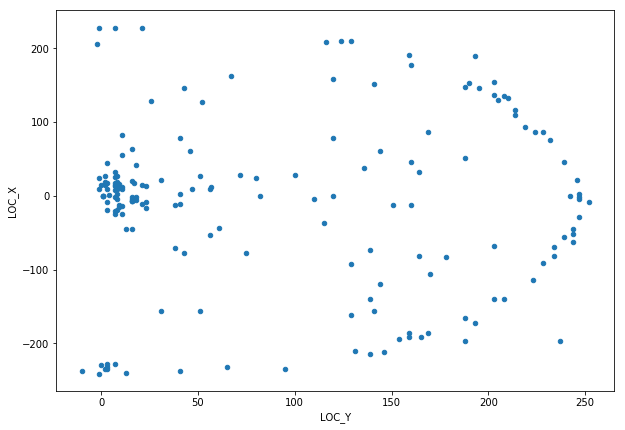

In [541]:
cha_vs_tor.plot(x="LOC_Y",y="LOC_X",kind="scatter")
plt.show()

__What does the ball motion data look like?__

[]

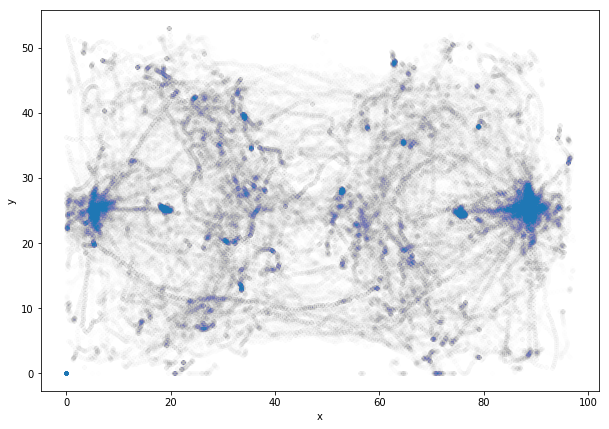

In [471]:
game.plot(x="x",y="y",kind="scatter",alpha=.005)
plt.plot()

Based on the two plots, it appears that the coordiante transformation is along the lines of $X_S=\frac{Y_N}{10}+5+I(X_S \geq 50)(94-X_S)$. We can see that the NBA hoop is located at $X_N=0$, but we will show in a second that the SportVU hoop is at $X_S=5$. We will also need to flip shots depending on if they are on the left or right side of the court.

For the Y-coordinates, we have $Y_S=\frac{X_N}{10}+25$, with no side transformation required, apparently.

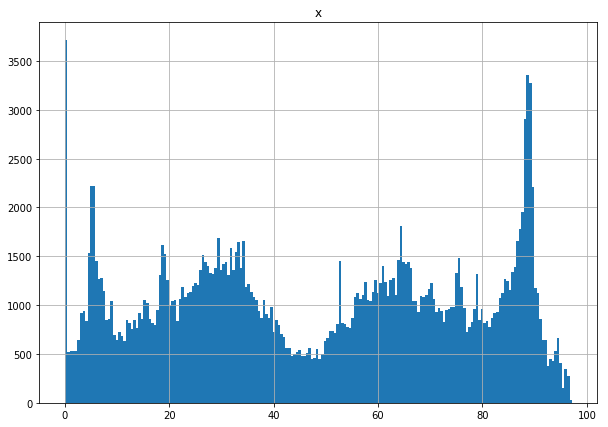

In [479]:
game.hist("x",bins=200)
plt.show()

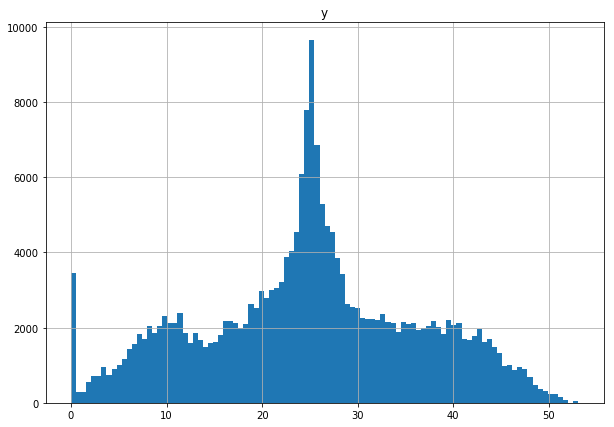

In [478]:
game.hist("y",bins=100)
plt.show()

Based on the histograms, it appears the locations of the hoops are: $L=(5,25)$ and $R=(94,25)$

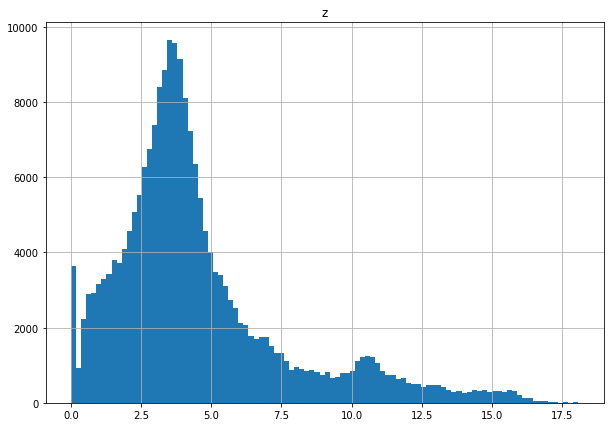

In [785]:
game.hist("z",bins=100)
plt.show()

__Question #1:__ Can we derive a mathematical transformation to link up the NBA and SportVU's coordinate systems?

__Examining the ball altitude__: In the NBA shot data, the time takes quarter, minutes, and seconds in separate columns. We will need to combine the minutes and seconds data from the NBA data in order to make it compatiable with SportVU.

In [18]:
mins_and_secs=cha_vs_tor.MINUTES_REMAINING.values*60+cha_vs_tor.SECONDS_REMAINING.values

In [19]:
mins_and_secs[0]

425.0

In [605]:
#Write a function to look at and analyze subsets
def examineShot(time,qtr,l_length,r_length):
    game_subset=game[(game["time"]<=(time+r_length))&(game["time"]>=(time-l_length))&(game["qtr"]==qtr)]
    game_subset=game_subset.sort_values(by="time",ascending=False)
    return(game_subset)

__How long are the time intervals for which there is a potential shot?__

In [606]:
shot_lengths=np.array([len(examineShot(mins_and_secs[i],cha_vs_tor.PERIOD.values[i],2,0)) for i in range(len(cha_vs_tor))])

(array([ 41.,  70.,  32.,  18.,   2.,   6.,   2.,   3.,   1.,   1.]),
 array([   0.,   92.,  184.,  276.,  368.,  460.,  552.,  644.,  736.,
         828.,  920.]),
 <a list of 10 Patch objects>)

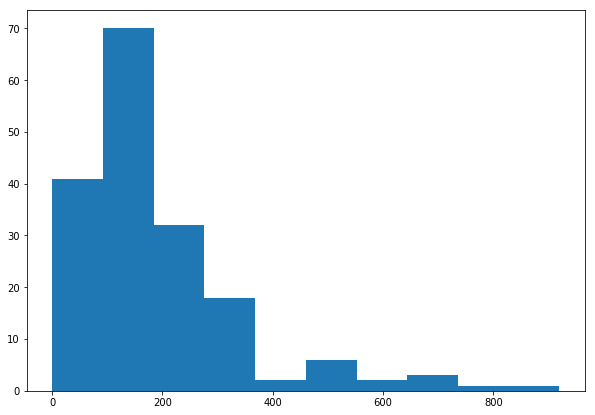

In [534]:
plt.hist(shot_lengths)

In [218]:
np.sort(shot_lengths)

array([  0,   0,   0,   0,   0,  19,  30,  50,  50,  50,  50,  50,  50,
        50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,
        50,  50,  50,  50,  50,  51,  51,  51,  51,  55,  60,  72,  74,
        88,  89,  98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 102, 102, 102, 102, 102, 102,
       102, 102, 108, 125, 126, 129, 140, 140, 140, 142, 148, 148, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       153, 153, 153, 153, 168, 176, 182, 184, 184, 185, 190, 192, 196,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 202, 204, 204, 204, 216, 223, 250, 250, 250, 250, 255, 270,
       300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
       300, 300, 304, 350, 352, 400, 400, 500, 500, 500, 515, 528, 533,
       567, 584, 650, 696, 700, 813, 920])

__For which the data exists, examine the ball altitude for each shot__

In [683]:
altitudes=[examineShot(mins_and_secs[i],cha_vs_tor.PERIOD.values[i],10,4) for i in range(len(cha_vs_tor))]

__Examining a single shot from the game__

AttributeError: 'ggplot' object has no attribute 'xlim'

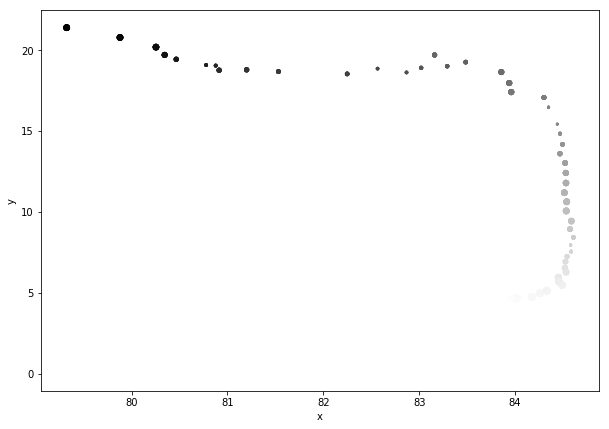

In [220]:
altitudes[50].plot(x="x",y="y",kind="scatter",s=altitudes[50].z*10,color=altitudes[50].time)
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

__Which sides are the team's shooting on?__ We can use the NBA API to get some information here.

We can examine the average x coordinates of the ball for each shot to get an idea of which side a team is shooting on.

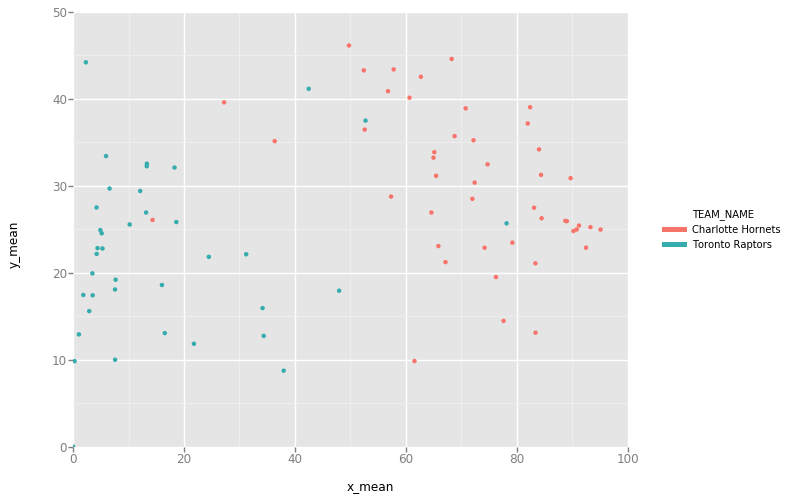

<ggplot: (-9223372036830168432)>

In [457]:
import ggplot

shot_loc_df[shot_loc_df["PERIOD"]<=2]

plt=ggplot(aes(x='x_mean', y='y_mean', color='TEAM_NAME'), data=shot_loc_df[shot_loc_df["PERIOD"]<=2])  + geom_point()
plt=plt+xlim(0,100)+ylim(0,50)
plt

In the first half, it appears the Raptors are shooting on the left side, and the Hornets are shooting on the right. Below, I've written a function that can take in a game and return whether the team is shooting on the left side or right side.

As of now, we determine the sides very rigorously. In the future, we may want to consider a simpler algorithm. We take the average $X$ location for the ball in each shot, categorize by team and half.

In [451]:
def findSides(game):
    #Doing some crafty shit here:
    team_names=game.TEAM_NAME.unique()
    team_half_combos=[team_names[0]+" 1st half",team_names[0]+" 2nd half+",team_names[1]+" 1st half",team_names[1]+" 2nd half+"]
    th_combos_df=pd.DataFrame(team_half_combos,columns=["combo"]).reset_index()
    half=pd.DataFrame(game.PERIOD<=2.0).replace({True: '1st half', False: '2nd half+'}).rename(columns={'PERIOD':'HALF'})
    game_combos_df=pd.DataFrame(game.TEAM_NAME+" "+half.HALF,columns=["combo"])
    game=pd.concat([game,half,game_combos_df],axis=1)
    game=game.merge(th_combos_df,on="combo",how="left").rename(columns={'index':'side'})
    shot_coords=[(examineShot(mins_and_secs[i],game.PERIOD.values[i])) for i in range(len(game))]
    mean_locs=pd.DataFrame([np.mean(sc.iloc[:,4:6]).tolist() for sc in shot_coords],columns=["x_mean","y_mean"]).reset_index(drop=True)
    game_shots=pd.concat([mean_shot_locs,game.iloc[:,(6,24)].reset_index(drop=True)],axis=1)
    x_loc_avgs=game_shots.groupby(["TEAM_NAME","HALF"]).mean().x_mean
    if(x_loc_avgs[team_names[0],"1st half"]<=x_loc_avgs[team_names[1],"1st half"]):
        game["side"]=game["side"].map({0:"Left",1:"Right",2:"Right",3:"Left"})
    else:
        game["side"]=game["side"].map({0:"Right",1:"Left",2:"Left",3:"Right"})
    game=game.drop("combo",1)
    return(game)

In [454]:
cha_tor_sides=findSides(cha_vs_tor)

__Revisiting the Frank Kaminsky shot__

Below are the details we have of the Frank Kaminsky shot now.

In [458]:
cha_tor_sides.iloc[50,:]

GRID_TYPE                 Shot Chart Detail
GAME_ID                            21500492
GAME_EVENT_ID                            76
PLAYER_ID                       1.62616e+06
PLAYER_NAME                  Frank Kaminsky
TEAM_ID                         1.61061e+09
TEAM_NAME                 Charlotte Hornets
PERIOD                                    1
MINUTES_REMAINING                         3
SECONDS_REMAINING                        46
EVENT_TYPE                      Missed Shot
ACTION_TYPE                       Jump Shot
SHOT_TYPE                    3PT Field Goal
SHOT_ZONE_BASIC           Above the Break 3
SHOT_ZONE_AREA         Left Side Center(LC)
SHOT_ZONE_RANGE                     24+ ft.
SHOT_DISTANCE                            24
LOC_X                                   -91
LOC_Y                                   228
SHOT_ATTEMPTED_FLAG                       1
SHOT_MADE_FLAG                            0
GAME_DATE                          20160101
HTM                             

In [467]:
#Reimport essential packages:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 7.0)

[]

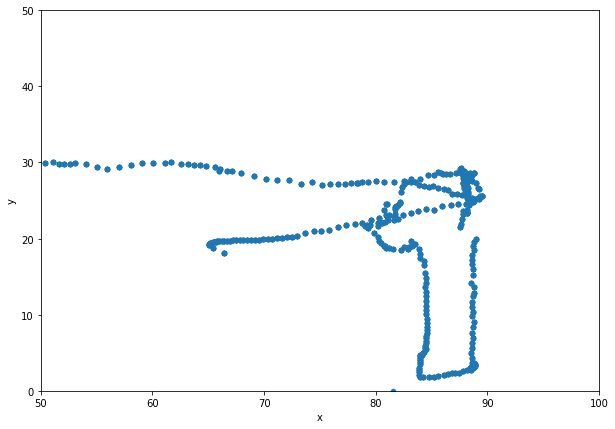

In [789]:
kaminsky=examineShot(mins_and_secs[50],1,10,4)
kaminsky.plot(x="x",y="y",kind="scatter")
plt.xlim(50,100)
plt.ylim(0,50)
plt.plot()

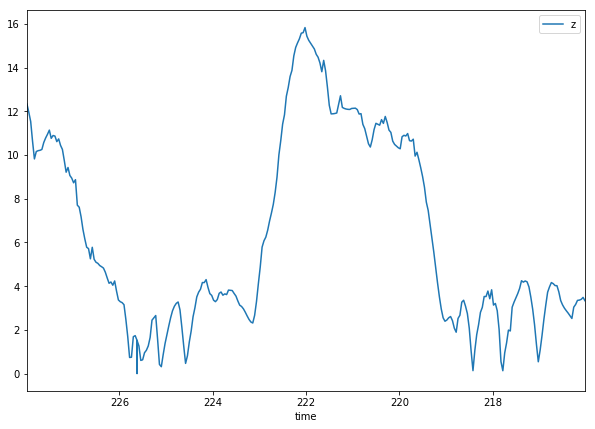

In [608]:
kaminsky.plot(x="time",y="z")
plt.show()

__Finding when the ball was released for this shot__: This is a well-behaved shot, there appears to be an obvious point of when the ball is in the air.

In [827]:
def shotDetails(i):
    shot=examineShot(mins_and_secs[i],cha_tor_sides.PERIOD.values[i],24,24)
    if(cha_tor_sides.side[i]=="Left"):
        shot=shot[shot["x"]<=max(cha_tor_sides.SHOT_DISTANCE.values[i],50)]
    else:
        shot=shot[shot["x"]>=max(cha_tor_sides.SHOT_DISTANCE.values[i],50)]
    if(np.max(shot.z.values)<10):
        return(np.zeros(2))
    max_point=np.argmax(shot.z.values)
    release_point=np.max(np.where(shot[:max_point].z<=5))
    hit_point=np.where(np.diff(shot.clock)>0)[0]
    if(len(hit_point)==0):
        shot_subset=shot.iloc[release_point:,:]
    else:
        shot_subset=shot.iloc[release_point:np.min(hit_point),:]
    return(shot_subset)

In [839]:
three_pointers=cha_tor_sides[cha_tor_sides["SHOT_DISTANCE"]>=24]

In [872]:
three_point_shots=[shotDetails(i) for i in three_pointers.index]

__What do 3 pointers look like?__ Here's a plot of the motion data of a set of three pointers within the game. Nonetheless, some of the shots are missing. We should check the histograms to see which ones may have low row counts so we can remove them. Once we know which three point shots are "well-behaved" we can compare them to the NBA API coordinate system and do some matching.

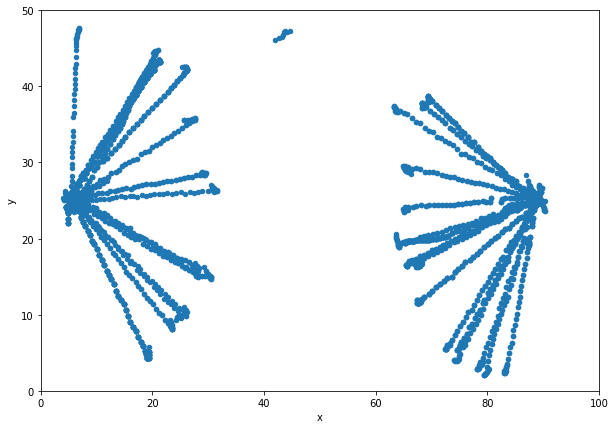

In [840]:
pd.concat(three_point_shots).plot(x="x",y="y",kind="scatter")
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

__Which shots are good or bad?__ By observing the sorted values, we can see that all well-behaved shots have at least 45 data points. As an ad hoc attempt to look at shots of interest, we will only look at shot attempts for which $r \geq 30$ where r denotes the number of rows in the dataset.

In [846]:
np.sort([len(t) for t in three_point_shots])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   9,  45,  49,  49,  50,  86,  88,  88,
        92,  94,  94,  96,  96,  96,  96,  98, 102, 104, 120, 126, 129,
       141, 143, 145, 150, 164, 184, 240, 245, 376, 400, 615])

We are interested in seeing the x and y coordinates of the __"release point"__ so we'll grab those from the dataframes.

In [896]:
release_points=[t.iloc[0,4:6].values for t in three_point_shots if len(t)>=30]

In [891]:
corresponding_XY=[three_pointers.iloc[i,17:19].values for i in range(len(three_pointers)) if len(three_point_shots[i])>=30]

In [960]:
point_comps=pd.concat([pd.DataFrame(release_points,columns=["sX","sY"]),pd.DataFrame(corresponding_XY,columns=["nY","nX"])],axis=1)

__Determine the relationship between SportVU and NBA API coordinates__

We should transform the coordinates before we work with them.

In [961]:
point_comps["sY"]=np.array(point_comps.sX>=50)*point_comps.sY+np.array(point_comps.sX<=50).astype(int)*(50-point_comps.sY)
point_comps["sX"]=np.array(point_comps.sX<=50)*point_comps.sX+np.array(point_comps.sX>=50).astype(int)*(94-point_comps.sX)
point_comps["nX"]=point_comps.nX/10+5
point_comps["nY"]=point_comps.nY/10+25

[]

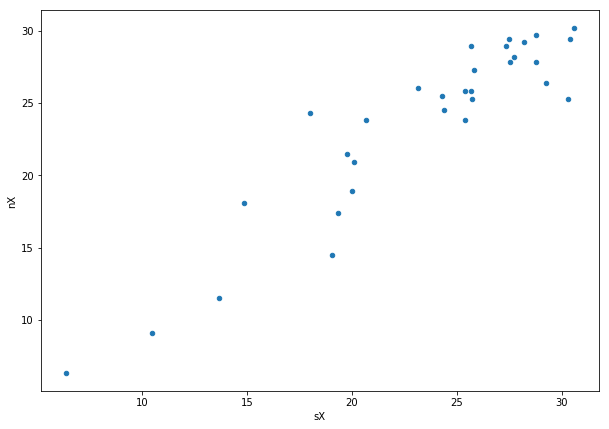

In [962]:
point_comps.plot(x="sX",y="nX",kind="scatter")
plt.plot()

[]

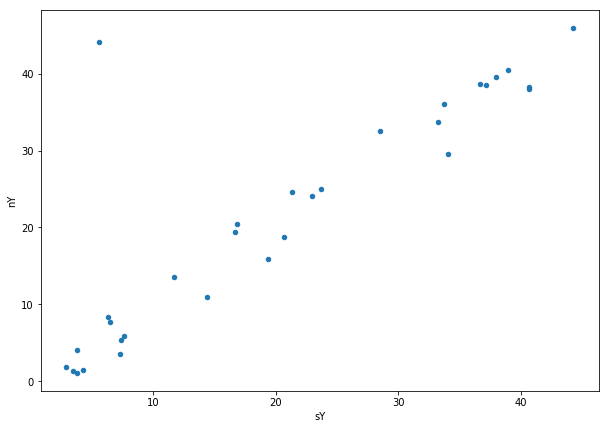

In [963]:
point_comps.plot(x="sY",y="nY",kind="scatter")
plt.plot()

Based on the lines, it appears that the X and Y coordinates are a good fit, excluding an outlier.

__Analysis of coordinate residuals__

In [970]:
np.sort(point_comps.sX-point_comps.nX)

array([-6.32438, -3.26531, -3.1952 , -3.14872, -2.84129, -1.89758,
       -1.72082, -1.55328, -1.46494, -1.19952, -0.99329, -0.92404,
       -0.78462, -0.45039, -0.42526, -0.25198, -0.12866, -0.11123,
        0.07407,  0.37351,  0.42234,  1.0007 ,  1.00266,  1.11762,
        1.35614,  1.58666,  1.94502,  2.17219,  2.84217,  4.53397,  5.01166])

In [971]:
np.sort(point_comps.sY-point_comps.nY)

array([-38.52079,  -4.09213,  -3.69178,  -3.26544,  -2.69564,  -2.2868 ,
        -2.11232,  -2.01914,  -1.93587,  -1.7138 ,  -1.62535,  -1.54839,
        -1.36618,  -1.28755,  -1.23796,  -1.14883,  -0.48314,  -0.20914,
         1.11232,   1.75054,   1.94618,   2.09317,   2.13573,   2.3533 ,
         2.65287,   2.74272,   2.79173,   3.42745,   3.51186,   3.80906,
         4.43004])

An ad hoc suggestion would be to determine which points are within $r=5$, where r denotes the radius of the shot location. Of course we would want to minimize the distance to the theoretical location.